# Shortest Paths

[Documentacion](https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.io
import networkx as nx

## Encontrar camino más corto entre nodos

In [9]:
G = nx.Graph()
nx.add_path(G, [0, 1, 2])
nx.add_path(G, [0, 10, 4, 2])

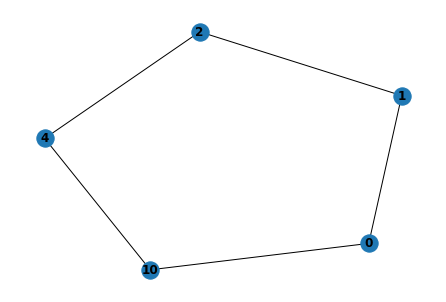

In [10]:
nx.draw(G, with_labels=True, font_weight='bold')

In [11]:
nx.shortest_path(G, source=0, target=2)

[0, 1, 2]

In [12]:
len(nx.shortest_path(G, source=0, target=2))-1

2

In [13]:
list(nx.all_shortest_paths(G, source=0, target=2))

[[0, 1, 2]]

In [14]:
dict_paths = nx.shortest_path(G)
dict_paths

{0: {0: [0], 1: [0, 1], 10: [0, 10], 2: [0, 1, 2], 4: [0, 10, 4]},
 1: {1: [1], 0: [1, 0], 2: [1, 2], 10: [1, 0, 10], 4: [1, 2, 4]},
 2: {2: [2], 1: [2, 1], 4: [2, 4], 0: [2, 1, 0], 10: [2, 4, 10]},
 10: {10: [10], 0: [10, 0], 4: [10, 4], 1: [10, 0, 1], 2: [10, 4, 2]},
 4: {4: [4], 10: [4, 10], 2: [4, 2], 0: [4, 10, 0], 1: [4, 2, 1]}}

In [15]:
dict_paths[4][0]

[4, 10, 0]

In [87]:
list(nx.shortest_path_length(G))

[(0, {0: 0, 1: 1, 10: 1, 2: 2, 4: 2}),
 (1, {1: 0, 0: 1, 2: 1, 10: 2, 4: 2}),
 (2, {2: 0, 1: 1, 4: 1, 0: 2, 10: 2}),
 (10, {10: 0, 0: 1, 4: 1, 1: 2, 2: 2}),
 (4, {4: 0, 10: 1, 2: 1, 0: 2, 1: 2})]

## Camino más corto

In [16]:
G = nx.Graph()
nx.add_path(G, [0, 1, 2, 5])
nx.add_path(G, [0, 10, 2])

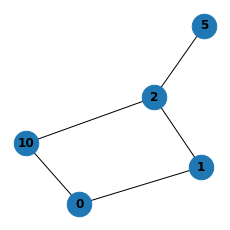

In [17]:
fig = plt.figure(figsize=(3, 3))

nx.draw(G, with_labels=True, font_weight='bold', node_size=600)

In [18]:
nx.shortest_path(G, source=0, target=2)

[0, 1, 2]

In [19]:
list(nx.all_shortest_paths(G, source=0, target=2))

[[0, 1, 2], [0, 10, 2]]

# Caminos más cortos de fv232

In [92]:
file_path = r"..\..\BCT\BCT\2019_03_03_BCT\data_and_demos\fve32.mat"

In [93]:
def open_mat_file(path):
    mat_json = scipy.io.loadmat(path)
    keys = list(mat_json.keys())
    
    lista = []
    for idx in range(3, len(mat_json.keys())):
        lista.append(mat_json[keys[idx]])
    return mat_json, lista

json, (names, cij) = open_mat_file(file_path)

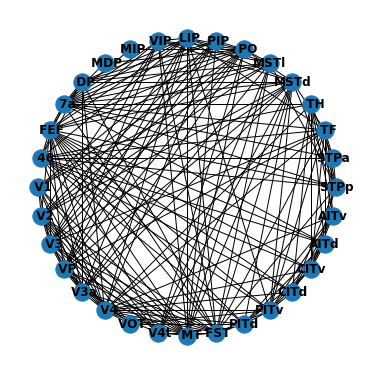

In [113]:
G = nx.from_numpy_array(cij)

node_labels = {idx: names[idx] for idx in range(len(cij))}
G = nx.relabel_nodes(G, node_labels)

fig = plt.figure(figsize=(5, 5))

nx.draw_shell(G, with_labels=True, font_weight='bold')

In [95]:
G.nodes

NodeView(('  V1', '  V2', '  V3', '  VP', ' V3a', '  V4', ' VOT', ' V4t', '  MT', ' FST', 'PITd', 'PITv', 'CITd', 'CITv', 'AITd', 'AITv', 'STPp', 'STPa', '  TF', '  TH', 'MSTd', 'MSTl', '  PO', ' PIP', ' LIP', ' VIP', ' MIP', ' MDP', '  DP', '  7a', ' FEF', '  46'))

In [96]:
nx.shortest_path(G, source='  V1', target='  VP')

['  V1', '  V2', '  VP']

In [97]:
dict_paths = nx.shortest_path(G)
dict_paths

{'  V1': {'  V1': ['  V1'],
  '  V2': ['  V1', '  V2'],
  '  V3': ['  V1', '  V3'],
  ' V3a': ['  V1', ' V3a'],
  '  V4': ['  V1', '  V4'],
  '  MT': ['  V1', '  MT'],
  'MSTl': ['  V1', 'MSTl'],
  '  PO': ['  V1', '  PO'],
  ' PIP': ['  V1', ' PIP'],
  ' V4t': ['  V1', ' V4t'],
  '  VP': ['  V1', '  V2', '  VP'],
  ' VOT': ['  V1', '  V2', ' VOT'],
  ' FST': ['  V1', '  V2', ' FST'],
  'MSTd': ['  V1', '  V2', 'MSTd'],
  ' VIP': ['  V1', '  V2', ' VIP'],
  ' FEF': ['  V1', '  V2', ' FEF'],
  '  TF': ['  V1', '  V3', '  TF'],
  ' LIP': ['  V1', '  V3', ' LIP'],
  '  DP': ['  V1', ' V3a', '  DP'],
  'PITd': ['  V1', '  V4', 'PITd'],
  'PITv': ['  V1', '  V4', 'PITv'],
  'CITd': ['  V1', '  V4', 'CITd'],
  'CITv': ['  V1', '  V4', 'CITv'],
  'AITv': ['  V1', '  V4', 'AITv'],
  '  TH': ['  V1', '  V4', '  TH'],
  '  46': ['  V1', '  V4', '  46'],
  'STPp': ['  V1', 'MSTl', 'STPp'],
  '  7a': ['  V1', 'MSTl', '  7a'],
  ' MIP': ['  V1', '  PO', ' MIP'],
  ' MDP': ['  V1', '  PO', ' MDP'],


In [98]:
dict_paths['  V1']['STPa']

['  V1', '  V3', '  TF', 'STPa']

In [99]:
dict_paths['  V1']['  V1']

['  V1']

In [68]:
list(nx.shortest_path_length(G))

[('  V1',
  {'  V1': 0,
   '  V2': 1,
   '  V3': 1,
   ' V3a': 1,
   '  V4': 1,
   '  MT': 1,
   'MSTl': 1,
   '  PO': 1,
   ' PIP': 1,
   ' V4t': 1,
   '  VP': 2,
   ' VOT': 2,
   ' FST': 2,
   'MSTd': 2,
   ' VIP': 2,
   ' FEF': 2,
   '  TF': 2,
   ' LIP': 2,
   '  DP': 2,
   'PITd': 2,
   'PITv': 2,
   'CITd': 2,
   'CITv': 2,
   'AITv': 2,
   '  TH': 2,
   '  46': 2,
   'STPp': 2,
   '  7a': 2,
   ' MIP': 2,
   ' MDP': 2,
   'AITd': 3,
   'STPa': 3}),
 ('  V2',
  {'  V2': 0,
   '  V1': 1,
   '  V3': 1,
   '  VP': 1,
   ' V3a': 1,
   '  V4': 1,
   ' VOT': 1,
   ' V4t': 1,
   '  MT': 1,
   ' FST': 1,
   'MSTd': 1,
   'MSTl': 1,
   '  PO': 1,
   ' PIP': 1,
   ' VIP': 1,
   ' FEF': 1,
   '  TF': 2,
   ' LIP': 2,
   '  DP': 2,
   'PITd': 2,
   'PITv': 2,
   'CITd': 2,
   'CITv': 2,
   'AITv': 2,
   '  TH': 2,
   '  46': 2,
   'STPp': 2,
   '  7a': 2,
   ' MIP': 2,
   ' MDP': 2,
   'AITd': 2,
   'STPa': 3}),
 ('  V3',
  {'  V3': 0,
   '  V1': 1,
   '  V2': 1,
   ' V3a': 1,
   '  V4': 1,


In [114]:
cij

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]], dtype=uint8)

In [118]:
for idx in range(len(cij)):
    print('Conecciones al nodo {} = {}'.format(names[idx], cij[idx].sum()))

Conecciones al nodo   V1 = 8
Conecciones al nodo   V2 = 15
Conecciones al nodo   V3 = 14
Conecciones al nodo   VP = 13
Conecciones al nodo  V3a = 12
Conecciones al nodo   V4 = 20
Conecciones al nodo  VOT = 5
Conecciones al nodo  V4t = 8
Conecciones al nodo   MT = 16
Conecciones al nodo  FST = 15
Conecciones al nodo PITd = 8
Conecciones al nodo PITv = 7
Conecciones al nodo CITd = 4
Conecciones al nodo CITv = 4
Conecciones al nodo AITd = 5
Conecciones al nodo AITv = 5
Conecciones al nodo STPp = 11
Conecciones al nodo STPa = 6
Conecciones al nodo   TF = 13
Conecciones al nodo   TH = 10
Conecciones al nodo MSTd = 16
Conecciones al nodo MSTl = 8
Conecciones al nodo   PO = 9
Conecciones al nodo  PIP = 8
Conecciones al nodo  LIP = 16
Conecciones al nodo  VIP = 9
Conecciones al nodo  MIP = 2
Conecciones al nodo  MDP = 2
Conecciones al nodo   DP = 10
Conecciones al nodo   7a = 12
Conecciones al nodo  FEF = 14
Conecciones al nodo   46 = 10
